# Essais de segmentation

In [1]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94269 entries, 0 to 94268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         94269 non-null  object 
 1   total_orders               94269 non-null  int64  
 2   avg_delivery_time_days     94269 non-null  float64
 3   days_since_last_order      94269 non-null  float64
 4   total_spent                94269 non-null  float64
 5   avg_review_score           94269 non-null  float64
 6   avg_delivery_delay_days    94269 non-null  float64
 7   max_delivery_delay_days    94269 non-null  float64
 8   last_order_status          94269 non-null  object 
 9   has_comment                94269 non-null  int64  
 10  last_payment_type          94269 non-null  object 
 11  last_payment_installments  94269 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 8.6+ MB


## Normalisation des données

In [4]:
# Normalisation de la colonne 'total_orders'
from sklearn.preprocessing import MinMaxScaler

# Initialisation du MinMaxScaler
scaler = MinMaxScaler()

# Fit et transformation de la colonne 'total_orders'
df['total_orders_normalized'] = scaler.fit_transform(df[['total_orders']])





In [5]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,last_order_status,has_comment,last_payment_type,last_payment_installments,total_orders_normalized
63176,ab4d9d11f3eb0285fafb15e374a73b7a,1,8.978391,125.130058,324.89,4.0,0.0,0.0,delivered,1,credit_card,8.0,0.0
41292,6ff4f4fcdadf8410fcae5bad48d7044d,1,21.940046,230.996678,212.03,1.0,0.0,0.0,delivered,1,credit_card,1.0,0.0
19859,35bd5e295fe699acc2e24b0de1e53663,1,11.336146,251.274271,189.37,4.0,0.0,0.0,delivered,0,credit_card,10.0,0.0
81828,ddd6924bb0a8101c1f910509ff573205,1,4.836956,326.810162,88.48,5.0,0.0,0.0,delivered,0,credit_card,5.0,0.0
74535,ca331839495652e51545aff8a5c11908,1,6.168484,278.083252,195.28,4.0,0.0,0.0,delivered,0,credit_card,8.0,0.0
85697,e863397ca773c34a6c8d75017b5557ec,1,32.177384,229.054329,377.00,1.0,0.0,0.0,delivered,1,credit_card,4.0,0.0
46262,7d5558ec09ab280a58b84e947c0a1b9a,1,18.371979,390.180567,88.72,5.0,0.0,0.0,delivered,0,boleto,1.0,0.0
28726,4df708cabf0d092e540230827dae04de,1,14.120046,111.287894,123.49,5.0,0.0,0.0,delivered,0,credit_card,1.0,0.0
69362,bc29d0a36e1f5445ca9101186f7b0aea,1,12.880359,617.162361,102.23,5.0,0.0,0.0,delivered,0,boleto,1.0,0.0
6700,120b30bc1bcce19c45e4fa7e7cc1d1e6,1,17.320845,141.301354,210.18,4.0,0.0,0.0,delivered,0,boleto,1.0,0.0


In [6]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments,total_orders_normalized
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.757350,0.765609,0.408119,2.928248,0.001674
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.673798,4.695404,0.491488,2.708299,0.014270
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,188.975081,1.000000,24.000000,1.000000


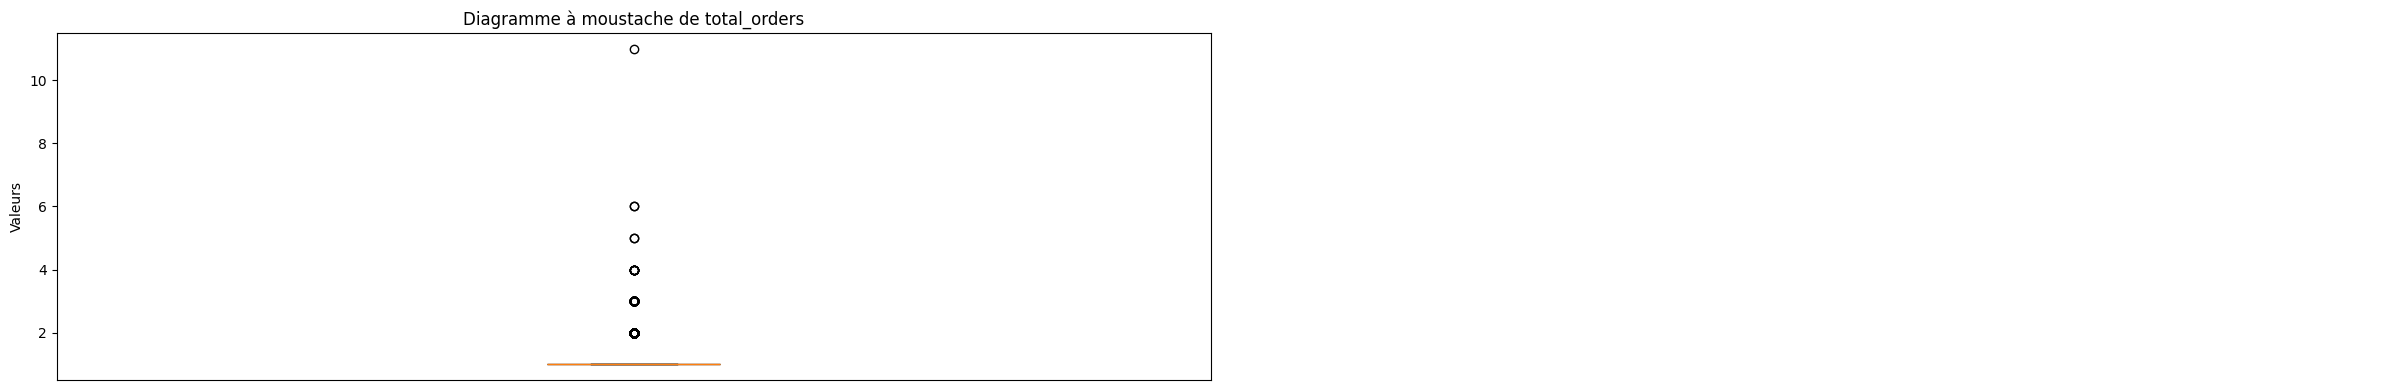

In [7]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

## Cette normalization sera utile pour aider les modèles de clustering à travailler convenablement.

Nous l'appliquons donc aux autres colonnes numériques :

 2   avg_delivery_time_days  92753 non-null  float64
 3   days_since_last_order   92753 non-null  float64
 4   total_spent             92753 non-null  float64
 5   avg_review_score        92753 non-null  float64

In [8]:
# Fit et transformation de la colonne 'avg_delivery_time_days'
df['avg_delivery_time_days_normalized'] = scaler.fit_transform(df[['avg_delivery_time_days']])

# Fit et transformation de la colonne 'days_since_last_order'
df['days_since_last_order_normalized'] = scaler.fit_transform(df[['days_since_last_order']])

# Fit et transformation de la colonne 'total_spent'
df['total_spent_normalized'] = scaler.fit_transform(df[['total_spent']])

# Fit et transformation de la colonne 'avg_review_score'
df['avg_review_score_normalized'] = scaler.fit_transform(df[['avg_review_score']])

#  6   avg_delivery_delay_days    94269 non-null  float64
#  7   max_delivery_delay_days    94269 non-null  float64
#  8   last_order_status          94269 non-null  object 
#  9   has_comment                94269 non-null  int64  
#  10  last_payment_type          94269 non-null  object 
#  11  last_payment_installments  94269 non-null  float64

# Fit et transformation de la colonne 'avg_delivery_delay_days'
df['avg_delivery_delay_days_normalized'] = scaler.fit_transform(df[['avg_delivery_delay_days']])
# Fit et transformation de la colonne 'max_delivery_delay_days'
df['max_delivery_delay_days_normalized'] = scaler.fit_transform(df[['max_delivery_delay_days']])
# Fit et transformation de la colonne 'has_comment'
df['has_comment_normalized'] = scaler.fit_transform(df[['has_comment']])
# Fit et transformation de la colonne 'last_payment_installments'
df['last_payment_installments_normalized'] = scaler.fit_transform(df[['last_payment_installments']])
# Fit et transformation de la colonne 'avg_review_score'
df['avg_review_score_normalized'] = scaler.fit_transform(df[['avg_review_score']])

# Hotencoding de la colonne 'last_order_status'
df = pd.get_dummies(df, columns=['last_order_status'], drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94269 entries, 0 to 94268
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    94269 non-null  object 
 1   total_orders                          94269 non-null  int64  
 2   avg_delivery_time_days                94269 non-null  float64
 3   days_since_last_order                 94269 non-null  float64
 4   total_spent                           94269 non-null  float64
 5   avg_review_score                      94269 non-null  float64
 6   avg_delivery_delay_days               94269 non-null  float64
 7   max_delivery_delay_days               94269 non-null  float64
 8   has_comment                           94269 non-null  int64  
 9   last_payment_type                     94269 non-null  object 
 10  last_payment_installments             94269 non-null  float64
 11  total_orders_no

In [10]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments,total_orders_normalized,avg_delivery_time_days_normalized,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,avg_delivery_delay_days_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.757350,0.765609,0.408119,2.928248,0.001674,0.057674,0.343237,0.011233,0.788869,0.004008,0.004051,0.408119,0.122010
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.673798,4.695404,0.491488,2.708299,0.014270,0.045534,0.219791,0.016355,0.320522,0.024732,0.024847,0.491488,0.112846
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.029990,0.164828,0.003878,0.750000,0.000000,0.000000,0.000000,0.041667
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.046564,0.315921,0.007113,1.000000,0.000000,0.000000,0.000000,0.083333
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.072845,0.500666,0.012432,1.000000,0.000000,0.000000,1.000000,0.166667
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,188.975081,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


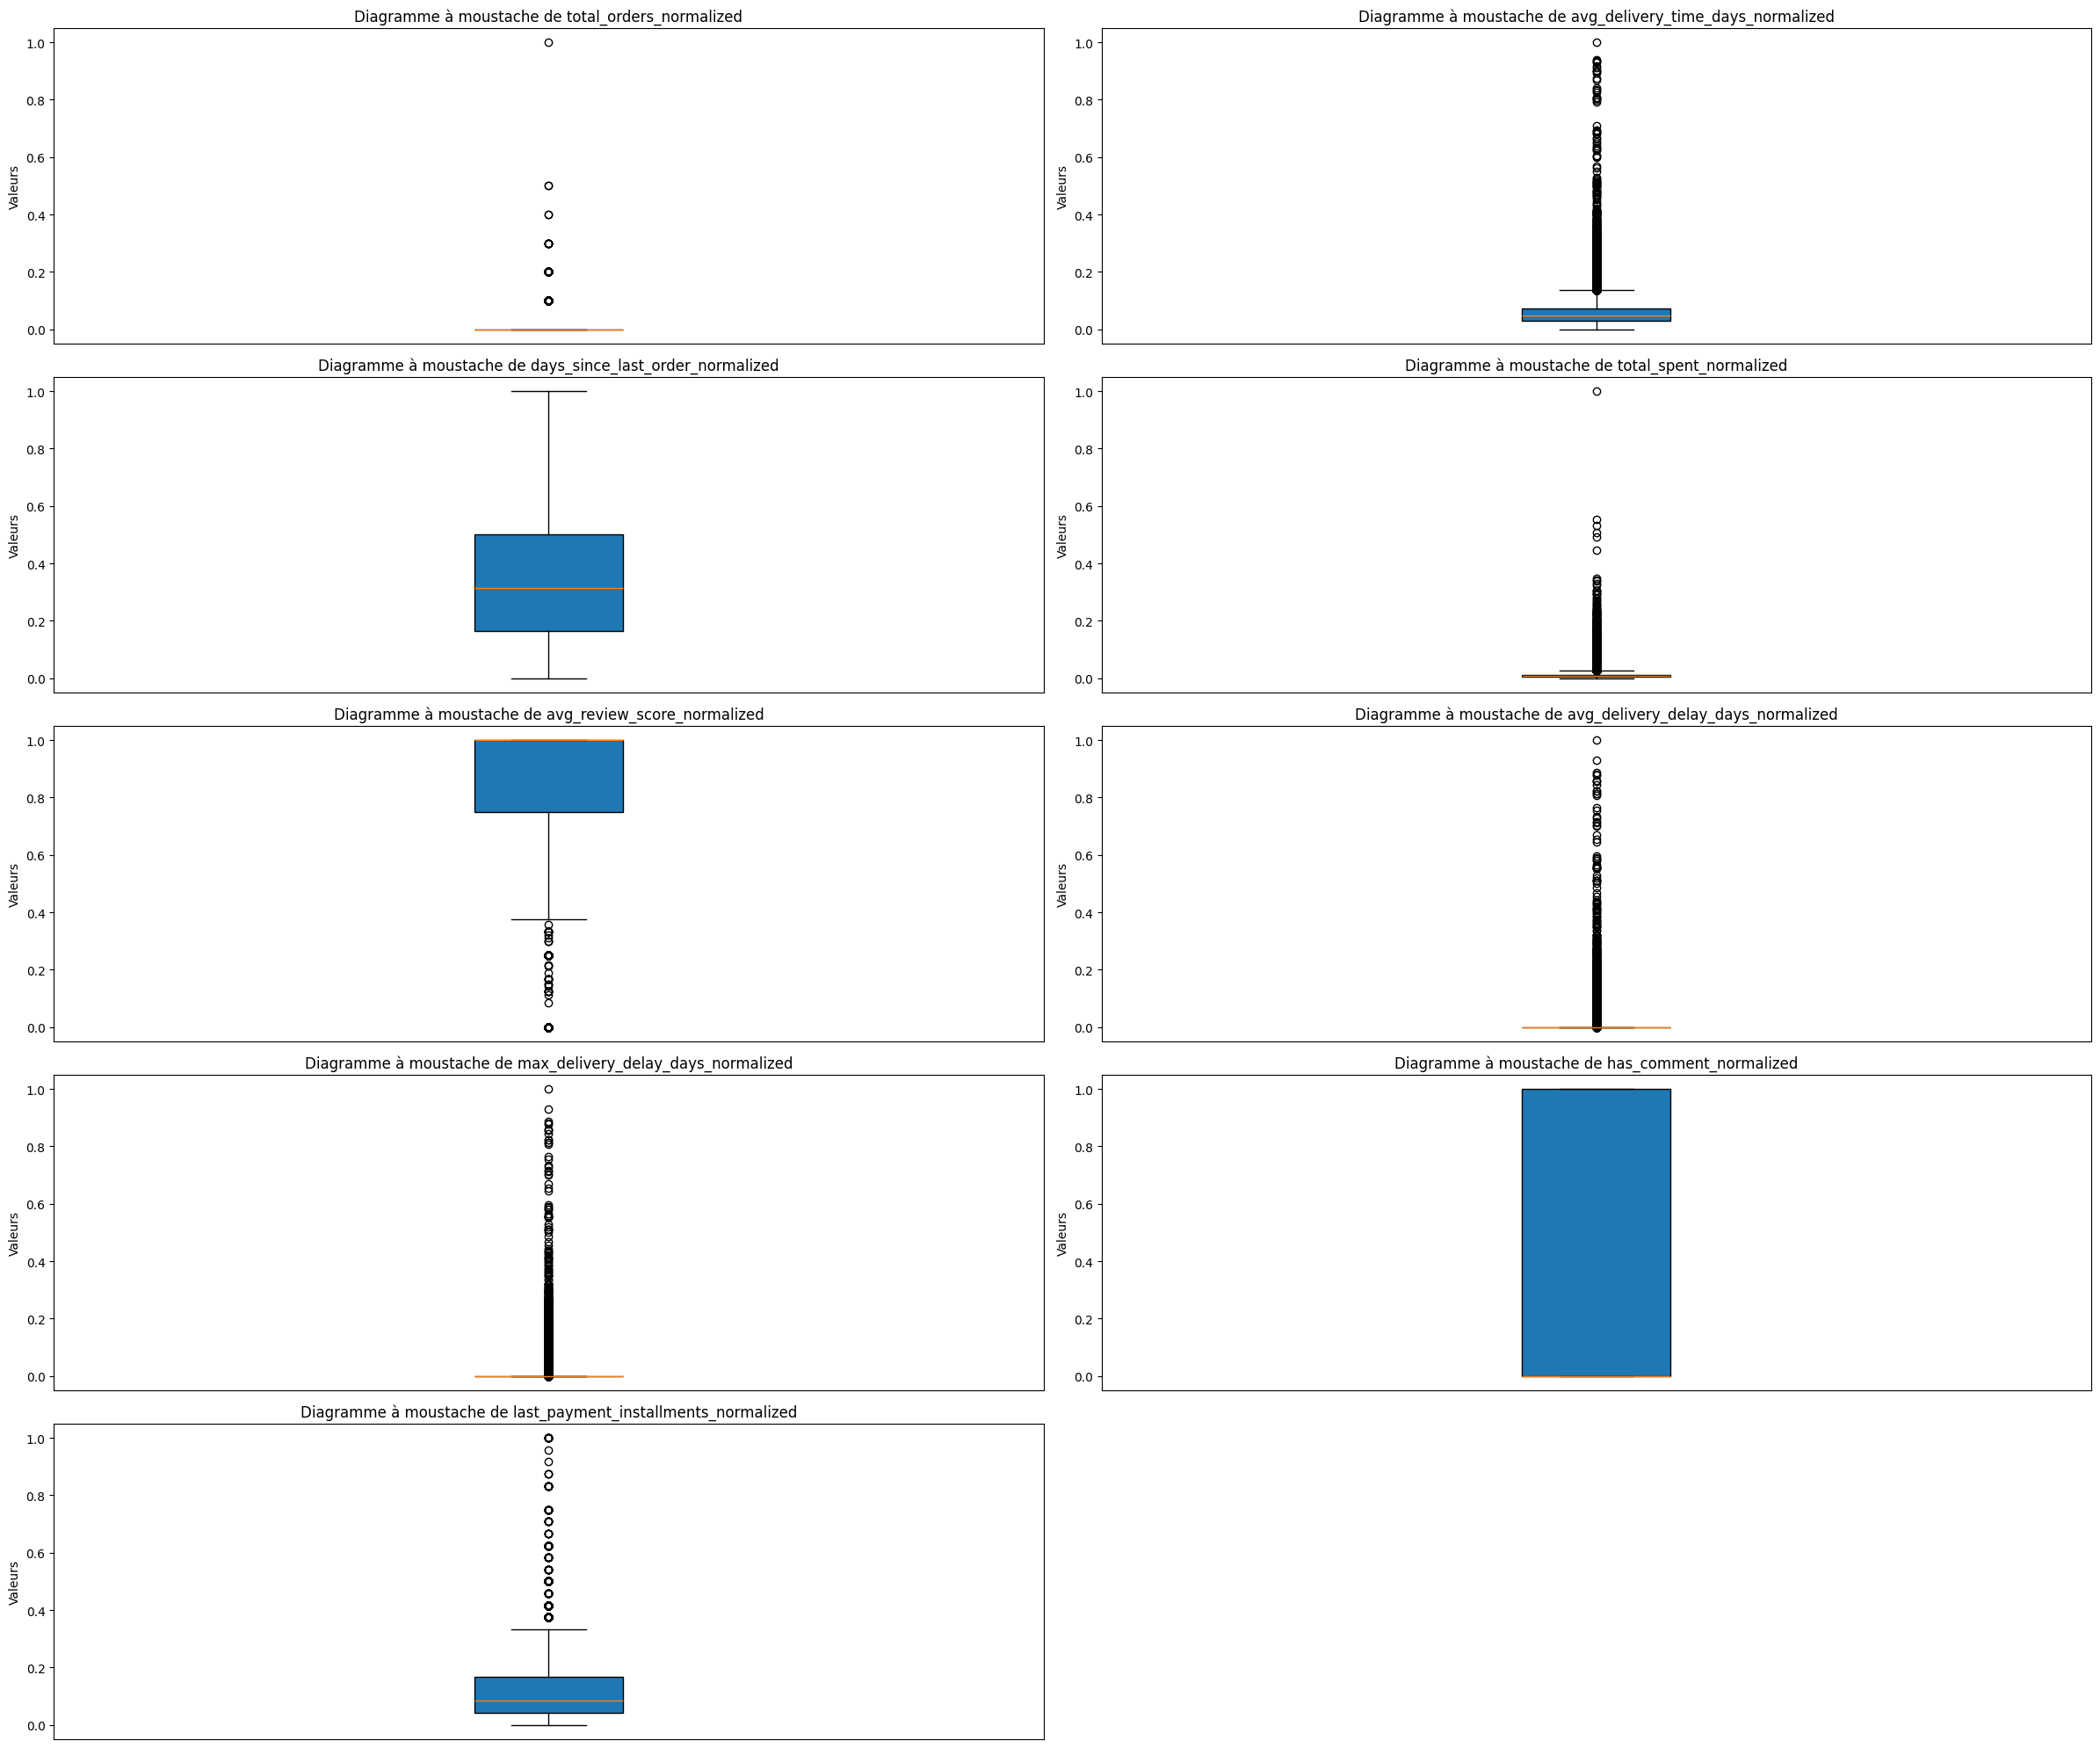

In [11]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders_normalized', 'avg_delivery_time_days_normalized', 'days_since_last_order_normalized', 'total_spent_normalized', 'avg_review_score_normalized', 'avg_delivery_delay_days_normalized', 'max_delivery_delay_days_normalized', 'has_comment_normalized', 'last_payment_installments_normalized']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

### Les données sont convenablement normalisées. Nous pouvons maintenant tester un clustering.

# Clustering KMeans

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94269 entries, 0 to 94268
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_unique_id                    94269 non-null  object 
 1   total_orders                          94269 non-null  int64  
 2   avg_delivery_time_days                94269 non-null  float64
 3   days_since_last_order                 94269 non-null  float64
 4   total_spent                           94269 non-null  float64
 5   avg_review_score                      94269 non-null  float64
 6   avg_delivery_delay_days               94269 non-null  float64
 7   max_delivery_delay_days               94269 non-null  float64
 8   has_comment                           94269 non-null  int64  
 9   last_payment_type                     94269 non-null  object 
 10  last_payment_installments             94269 non-null  float64
 11  total_orders_no

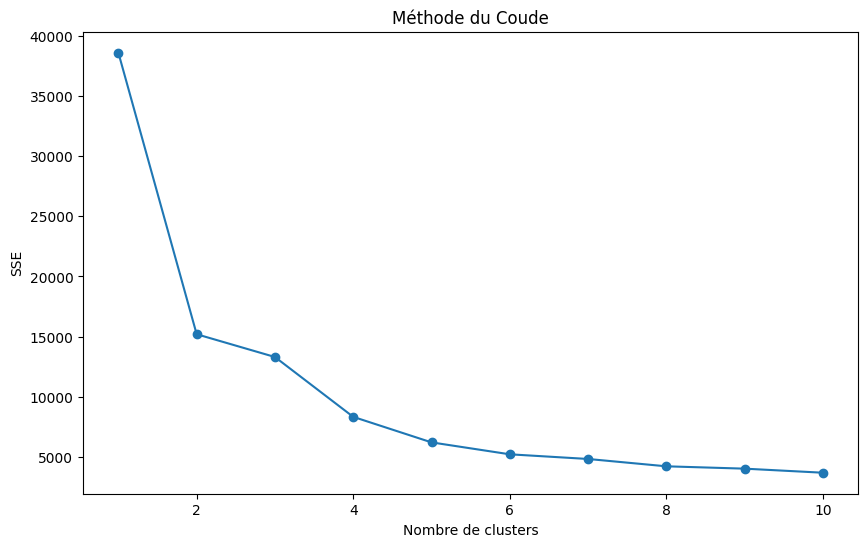

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supposons que 'df' est votre DataFrame

# Étape 1 : Sélection des colonnes pour le clustering
features = df[['total_orders_normalized', 'avg_delivery_time_days_normalized', 'days_since_last_order_normalized', 'total_spent_normalized', 'avg_review_score_normalized', 'avg_delivery_delay_days_normalized', 'max_delivery_delay_days_normalized', 'has_comment_normalized', 'last_payment_installments_normalized', 'last_order_status_delivered']]

# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()




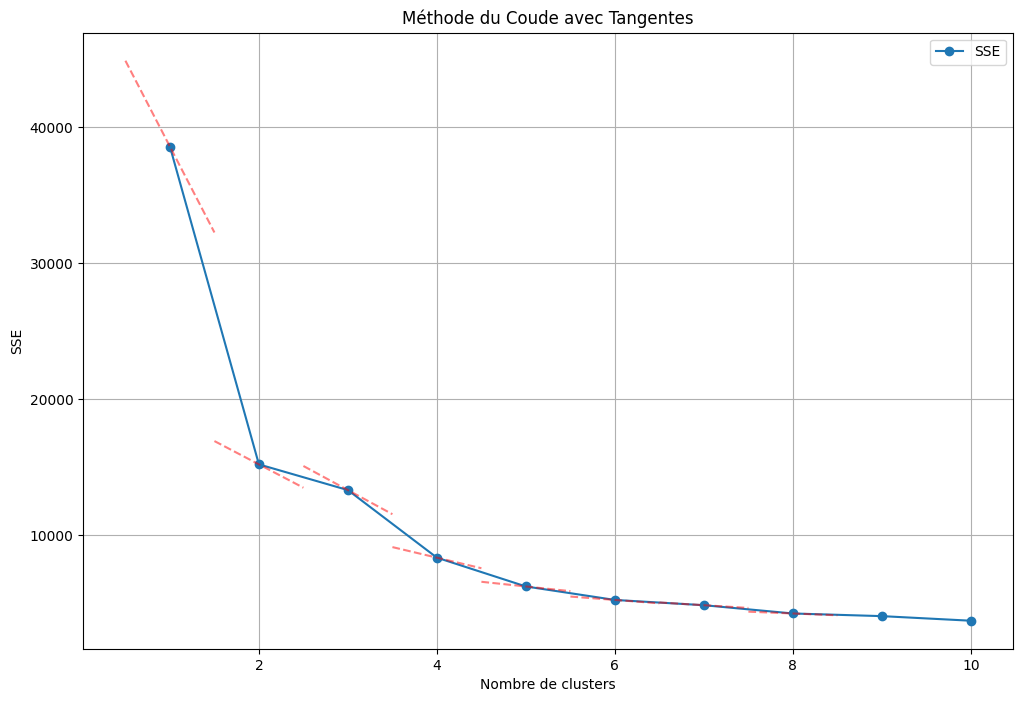

Nombre de clusters: 2, Score: 0.0000
Nombre de clusters: 3, Score: 0.2428
Nombre de clusters: 4, Score: 0.1799
Nombre de clusters: 5, Score: 0.1754
Nombre de clusters: 6, Score: 0.1576
Nombre de clusters: 7, Score: 0.1372
Nombre de clusters: 8, Score: 0.1210
Nombre de clusters: 9, Score: 0.1088


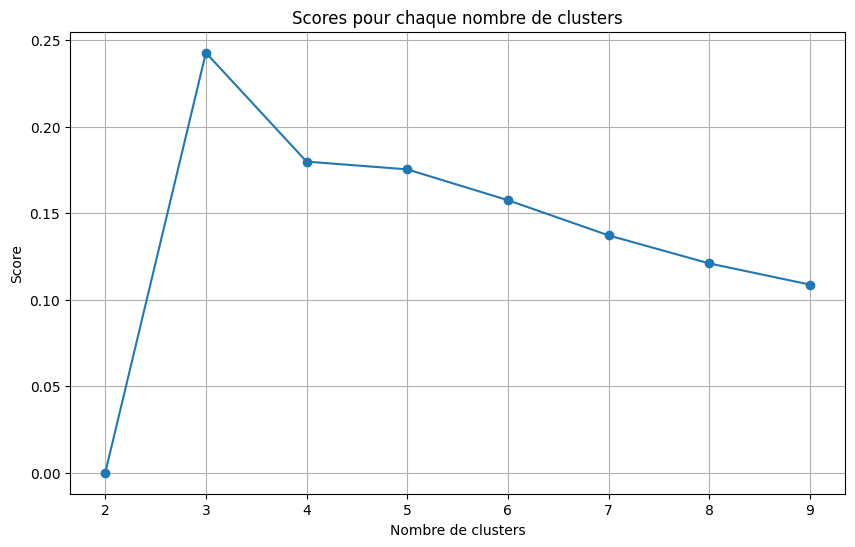

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = []  # Liste pour stocker la somme des distances au carré
k_range = range(1, 11)  # Testez k de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  # Inertia: Somme des distances au carré

# Étape 3 : Calcul des tangentes
def calculate_tangent(x1, y1, x2, y2):
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    return slope, intercept

tangents = []
for i in range(1, len(sse) - 1):
    slope, intercept = calculate_tangent(k_range[i-1], sse[i-1], k_range[i+1], sse[i+1])
    tangents.append((slope, intercept))

# Étape 4 : Tracer la courbe SSE et les tangentes
plt.figure(figsize=(12, 8))
plt.plot(k_range, sse, marker='o', label='SSE')
plt.title('Méthode du Coude avec Tangentes')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')

# Tracer les tangentes
for i, (slope, intercept) in enumerate(tangents, start=1):
    x = np.array([i-0.5, i+0.5])
    y = slope * x + intercept
    plt.plot(x, y, 'r--', alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()

# Étape 5 : Calcul des angles entre les tangentes consécutives
angles = []
for i in range(len(tangents) - 1):
    angle = np.abs(np.arctan(tangents[i][0]) - np.arctan(tangents[i+1][0]))
    angles.append(np.degrees(angle))

import numpy as np

# Calcul des pentes des tangentes
slopes = [tangent[0] for tangent in tangents]

# Normalisation des pentes
normalized_slopes = np.abs(slopes) / max(np.abs(slopes))

# Calcul d'un score qui favorise les pentes proches de l'horizontale et les petits nombres de clusters
scores = [(1 - slope) * (1 / (i + 2)) for i, slope in enumerate(normalized_slopes)]

# Affichage des scores pour chaque nombre de clusters
for k, score in enumerate(scores, start=2):
    print(f"Nombre de clusters: {k}, Score: {score:.4f}")

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(scores) + 2), scores, marker='o')
plt.title('Scores pour chaque nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Selon cette analyse, nous pouvons suggérer que 4 est le bon nombre de clusters, pour éviter la sur-segmentation ou la sous-segmentation (même si 3 semble être un très bon candidat, avoir 4 clusters sera plus précis).

In [15]:
optimal_k = 6

In [16]:
# Étape 3 : Clustering K-Means avec le nombre de clusters choisi

nbClusters = optimal_k

kmeans_optimal = KMeans(n_clusters=nbClusters, random_state=42)
clusters = kmeans_optimal.fit_predict(features)

# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = clusters

# Maintenant, 'df' contient une colonne supplémentaire 'cluster_label' indiquant le cluster attribué à chaque observation.

In [17]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_type,...,avg_delivery_time_days_normalized,days_since_last_order_normalized,total_spent_normalized,avg_review_score_normalized,avg_delivery_delay_days_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,last_order_status_delivered,cluster_label
86109,e99bcd86a7d27f3c7eb57ca29ed9f831,1,8.488125,246.350000,38.01,5.0,0.000000,0.000000,1,credit_card,...,0.038277,0.283658,0.002081,1.0,0.000000,0.000000,1.0,0.041667,True,5
33967,5bf17ccb9d018be3b0c2c1987d681352,1,16.398137,319.282465,101.73,1.0,0.000000,0.000000,1,credit_card,...,0.076339,0.388564,0.006748,0.0,0.000000,0.000000,1.0,0.041667,True,3
62890,aa8e52652dcc6bc33a2b427717809138,1,13.935289,398.936944,64.00,5.0,0.000000,0.000000,0,credit_card,...,0.064488,0.503138,0.003985,1.0,0.000000,0.000000,0.0,0.125000,True,0
78239,d4017905e4548317a2065065c8cdfad0,1,6.333345,624.279722,65.55,5.0,0.000000,0.000000,0,credit_card,...,0.027909,0.827270,0.004098,1.0,0.000000,0.000000,0.0,0.041667,True,0
63456,ac2593adb817694bb87be3eb71ea1c74,1,4.173229,65.090961,33.23,5.0,0.000000,0.000000,0,credit_card,...,0.017514,0.022936,0.001731,1.0,0.000000,0.000000,0.0,0.041667,True,2
24469,427525f6f5aee13983a2a1ad80d9e920,1,22.805023,547.973356,112.76,5.0,0.602708,0.602708,0,credit_card,...,0.107169,0.717511,0.007556,1.0,0.003189,0.003189,0.0,0.083333,True,0
43887,770f0c82878b6013388ae367fad940ae,1,18.694468,263.429676,172.84,5.0,0.000000,0.000000,0,credit_card,...,0.087389,0.308225,0.011956,1.0,0.000000,0.000000,0.0,0.291667,True,2
93000,fc915e2d48727afd71b2e31dc2cb7147,1,10.178414,283.998669,102.14,1.0,0.000000,0.000000,1,boleto,...,0.046411,0.337811,0.006778,0.0,0.000000,0.000000,1.0,0.041667,True,3
86420,ea638fb7f3303f3c72cf8e7af61a6a37,1,5.857755,490.778426,142.01,5.0,0.000000,0.000000,0,credit_card,...,0.025620,0.635242,0.009698,1.0,0.000000,0.000000,0.0,0.166667,True,0
50672,89b30dd291178926f8564ac63b8d663a,1,14.070208,340.225301,142.96,5.0,0.000000,0.000000,0,credit_card,...,0.065138,0.418688,0.009767,1.0,0.000000,0.000000,0.0,0.083333,True,0


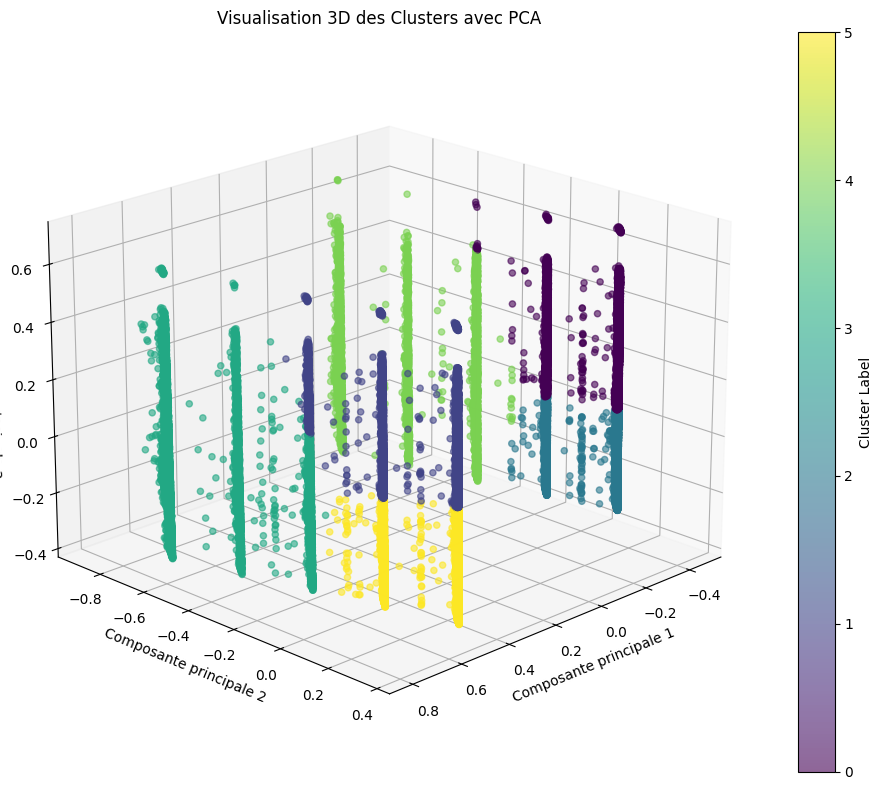

Variance expliquée par chaque composante principale:
PC1: 61.53%
PC2: 22.71%
PC3: 11.81%
Variance totale expliquée: 96.05%


In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que 'clusters' est le résultat de votre clustering KMeans avec le DataFrame 'df' et 'features' vos colonnes normalisées

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=3)  # Réduction à 3 dimensions
reduced_features = pca.fit_transform(features)

# Ajout des composantes principales au DataFrame
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]
df['pca3'] = reduced_features[:, 2]

# Création d'une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster_label'], cmap='viridis', alpha=0.6)

# Ajout des labels et du titre
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
ax.set_title('Visualisation 3D des Clusters avec PCA')

# Ajout d'une barre de couleur
plt.colorbar(scatter, label='Cluster Label')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Affichage de la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2%}")

print(f"Variance totale expliquée: {sum(explained_variance_ratio):.2%}")

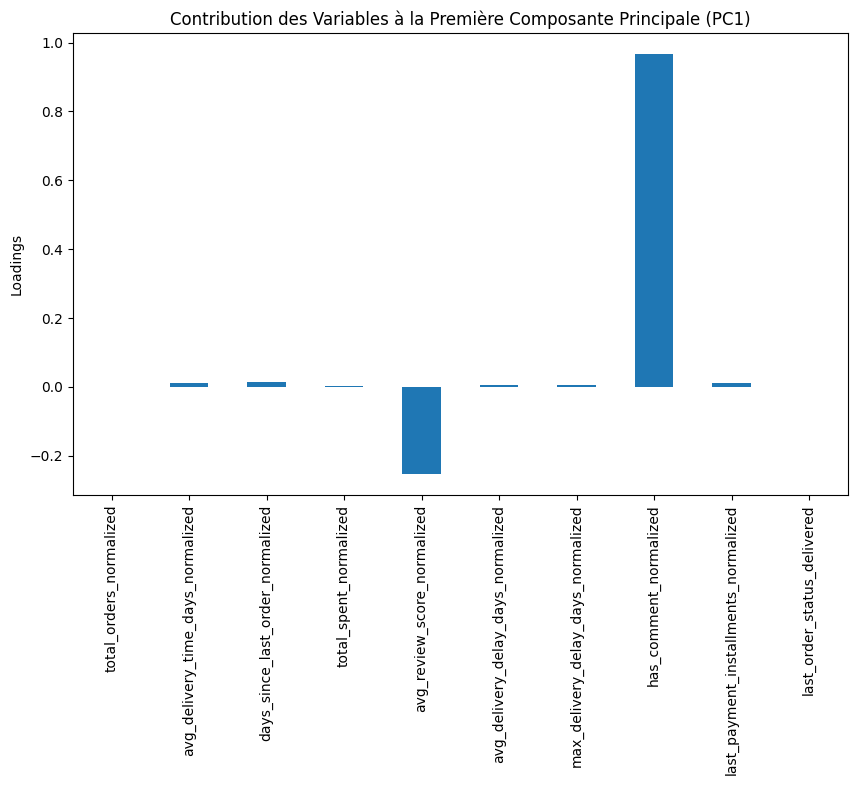

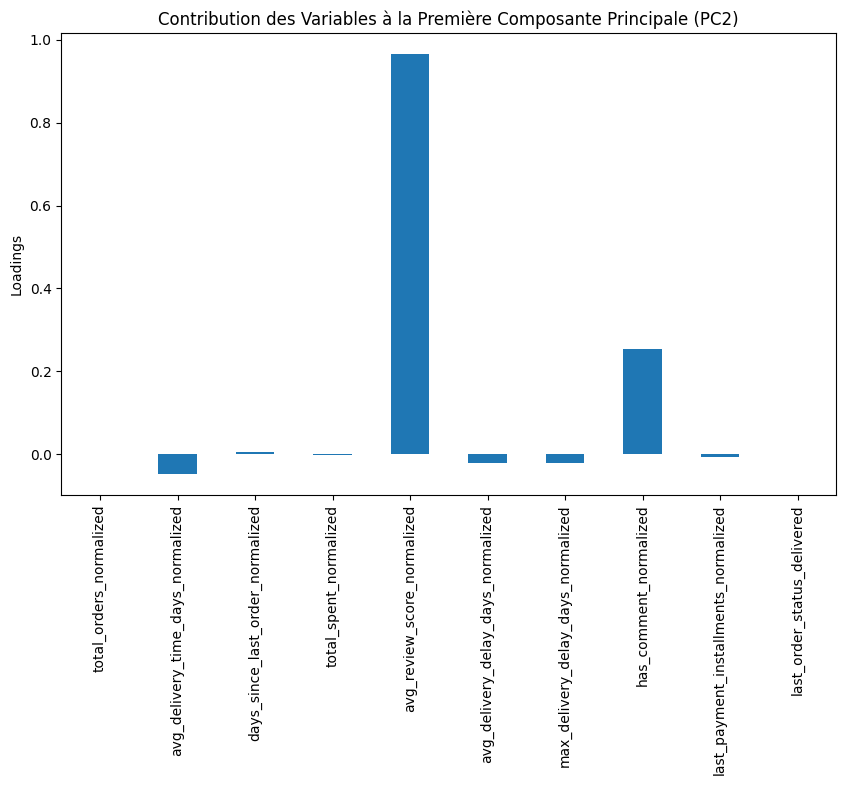

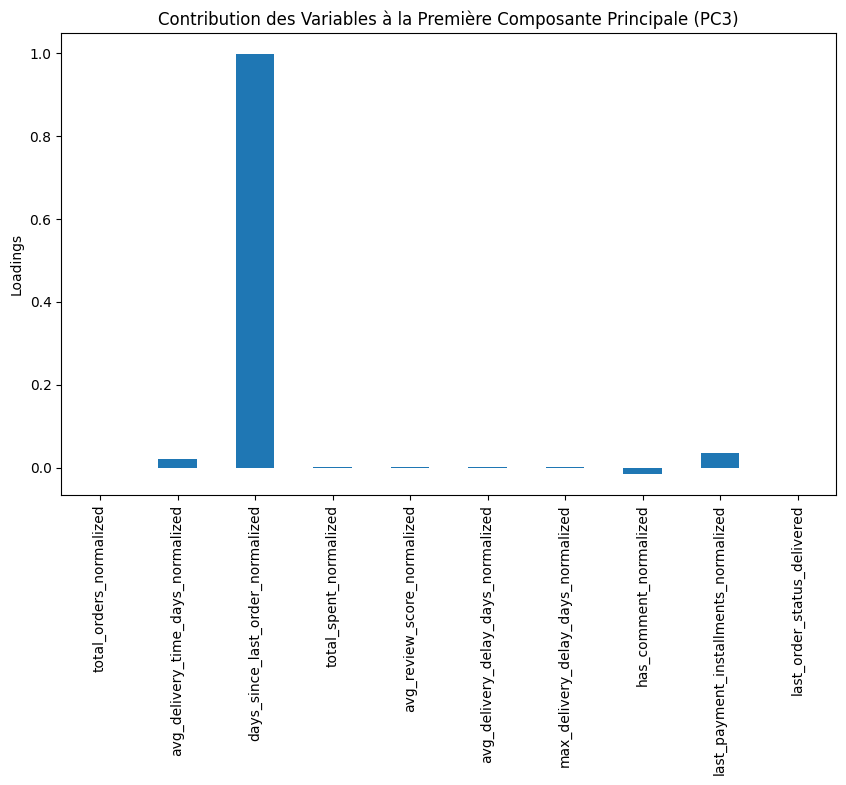

In [19]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=features.columns)

# Graphique en barres pour les loadings de la première composante principale
loadings['PC1'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC1)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC2 
loadings['PC2'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC2)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC3
loadings['PC3'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC3)')
plt.ylabel('Loadings')
plt.show()

In [20]:
import plotly.graph_objects as go

# Supposons que 'loadings' est votre DataFrame
# Conversion de 'loadings' en une matrice si ce n'est pas déjà le cas
# loadings_matrix = loadings.values si 'loadings' est un DataFrame

# Création de la heatmap
fig = go.Figure(data=go.Heatmap(
    z=loadings,  # Utiliser loadings_matrix si nécessaire
    x=loadings.columns,  # Les étiquettes des colonnes pour l'axe X
    y=loadings.index,  # Les étiquettes des lignes pour l'axe Y
    colorscale='Viridis',  # Palette de couleurs
    colorbar=dict(title='Scale'),  # Titre de la barre de couleur
))

# Générer des annotations pour chaque valeur dans la heatmap
annotations = []
for i, row in enumerate(loadings.index):
    for j, col in enumerate(loadings.columns):
        annotations.append(
            dict(
                x=col, y=row,
                text=str(loadings.loc[row, col].round(3)),  # Arrondi à 3 décimales
                xref='x1', yref='y1',
                font=dict(color="white" if loadings.loc[row, col] > loadings.values.mean() else "black", size=12),
                showarrow=False)
        )

# Ajouter les annotations au layout
fig.update_layout(
    annotations=annotations,
    title='Heatmap des Loadings PCA',
    xaxis=dict(title='Composantes'),
    yaxis=dict(title='Variables'),
    xaxis_tickangle=-45
)

fig.show()


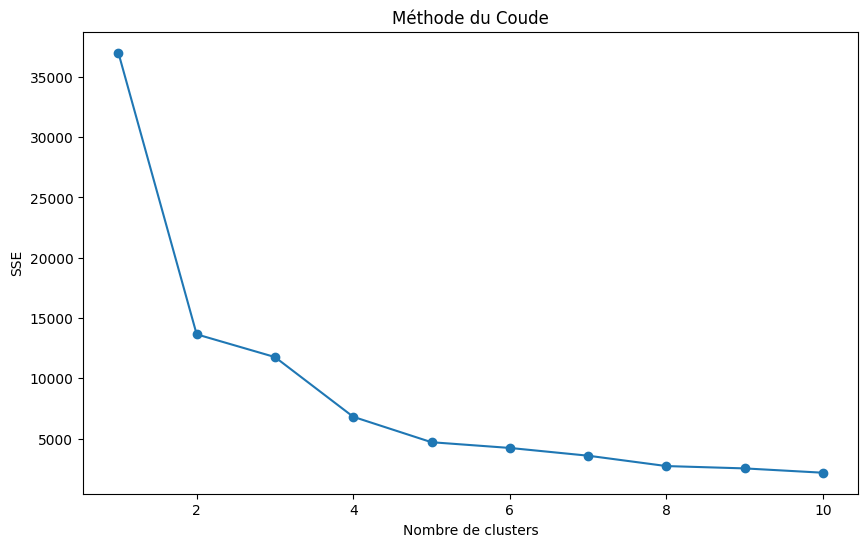

In [21]:
# Do a KMeans clustering with columns has_comment_normalized, avg_review_score_normalized, days_since_last_order_normalized 

# Étape 1 : Sélection des colonnes pour le clustering
features = df[['has_comment_normalized', 'avg_review_score_normalized', 'days_since_last_order_normalized']]
# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()


In [22]:
# On choisit 6 clusters
nbClusters = 6

kmeans_optimal = KMeans(n_clusters=nbClusters, random_state=42)
clusters = kmeans_optimal.fit_predict(features)

# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = clusters

# Maintenant, 'df' contient une colonne supplémentaire 'cluster_label' indiquant le cluster attribué à chaque observation.

df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_type,...,avg_review_score_normalized,avg_delivery_delay_days_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,last_order_status_delivered,cluster_label,pca1,pca2,pca3
51889,8d39f6fecda2476bd70895d99291e3bf,1,7.281262,345.129132,219.74,5.0,0.0,0.0,0,boleto,...,1.00,0.0,0.0,0.0,0.041667,True,0,-0.448198,0.102920,0.085352
65960,b2d1929493cdc221883eba2f1deef82a,1,12.099433,179.023738,83.33,4.0,0.0,0.0,0,credit_card,...,0.75,0.0,0.0,0.0,0.041667,True,5,-0.388169,-0.140726,-0.152976
77650,d28807b712185e7c8ddf7f5c337385e7,1,12.959931,388.103380,248.48,4.0,0.0,0.0,0,credit_card,...,0.75,0.0,0.0,0.0,0.416667,True,0,-0.379612,-0.141627,0.160384
49518,8664bccb45764bda2a258145c946ae0c,1,7.611238,593.855891,36.10,5.0,0.0,0.0,0,credit_card,...,1.00,0.0,0.0,0.0,0.041667,True,0,-0.443213,0.104505,0.442823
7578,145f5c920dcccbb95081ceaa800df82e,1,12.460787,377.334271,1692.59,2.0,0.0,0.0,1,credit_card,...,0.25,0.0,0.0,1.0,0.333333,True,1,0.712881,-0.371413,0.126874
40057,6c83dc22379e00e0caef724d5ce6e068,1,11.852882,173.865347,218.98,5.0,0.0,0.0,1,credit_card,...,1.00,0.0,0.0,1.0,0.416667,True,3,0.520292,0.351502,-0.162473
26457,47b44949f1dc684274f579fc954afa26,1,14.533368,204.306678,141.91,5.0,0.0,0.0,0,credit_card,...,1.00,0.0,0.0,0.0,0.083333,True,2,-0.450119,0.100130,-0.114877
7779,14debbd298c3b01daa32cef625668068,1,6.335301,106.389375,88.69,4.0,0.0,0.0,0,credit_card,...,0.75,0.0,0.0,0.0,0.083333,True,5,-0.389492,-0.140133,-0.256510
40472,6da92ae920ab16fc4eceb8fcd7bd43ce,1,4.935012,320.852812,91.66,4.0,0.0,0.0,0,boleto,...,0.75,0.0,0.0,0.0,0.041667,True,5,-0.385753,-0.138172,0.050130
4583,0c4c416f1f9844e6805b074f8f96f52c,1,10.212593,445.341111,87.24,5.0,0.0,0.0,0,credit_card,...,1.00,0.0,0.0,0.0,0.166667,True,0,-0.444597,0.102243,0.233924


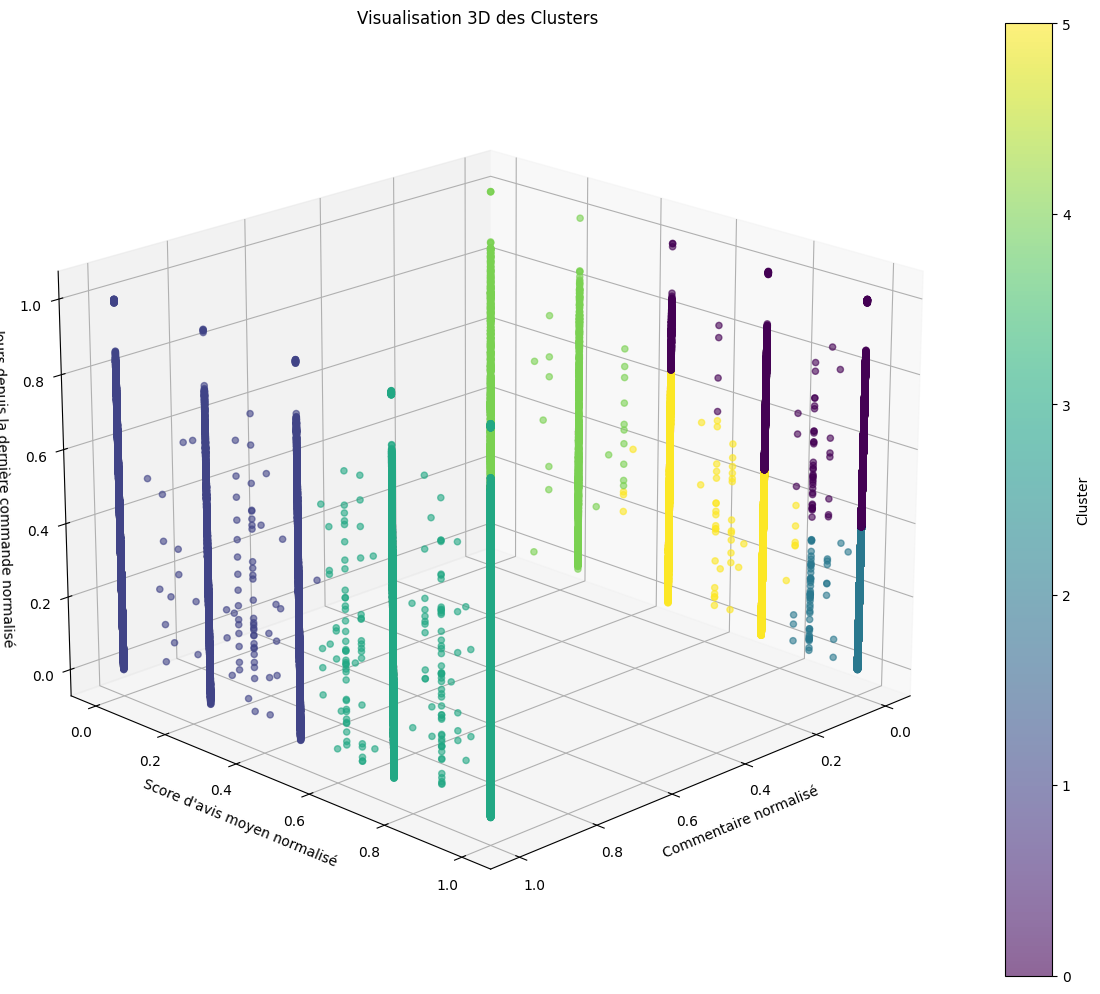

Statistiques des clusters:
               has_comment_normalized  avg_review_score_normalized  \
cluster_label                                                        
0                                 0.0                     0.932317   
1                                 1.0                     0.176672   
2                                 0.0                     0.999696   
3                                 1.0                     0.942809   
4                                 0.0                     0.079753   
5                                 0.0                     0.675568   

               days_since_last_order_normalized  count  
cluster_label                                           
0                                      0.586877  17874  
1                                      0.344330  12501  
2                                      0.187563  22081  
3                                      0.352814  25972  
4                                      0.344808   2970  
5            

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assurez-vous que df contient les colonnes nécessaires et que le clustering a été effectué

# Création d'une figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D
scatter = ax.scatter(
    df['has_comment_normalized'],
    df['avg_review_score_normalized'],
    df['days_since_last_order_normalized'],
    c=df['cluster_label'],
    cmap='viridis',
    alpha=0.6
)

# Ajout des labels et du titre
ax.set_xlabel('Commentaire normalisé')
ax.set_ylabel('Score d\'avis moyen normalisé')
ax.set_zlabel('Jours depuis la dernière commande normalisé')
ax.set_title('Visualisation 3D des Clusters')

# Ajout d'une barre de couleur
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Statistiques descriptives pour chaque cluster
cluster_stats = df.groupby('cluster_label').agg({
    'has_comment_normalized': 'mean',
    'avg_review_score_normalized': 'mean',
    'days_since_last_order_normalized': 'mean',
    'cluster_label': 'count'
}).rename(columns={'cluster_label': 'count'})

print("Statistiques des clusters:")
print(cluster_stats)

# Caractéristiques des centroides
centroids = kmeans_optimal.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['has_comment', 'avg_review_score', 'days_since_last_order'])
centroid_df.index.name = 'Cluster'

print("\nCaractéristiques des centroides:")
print(centroid_df)

Idées de segmentation (à 8 clusters)

- Cluster 0 : Clients ayant une note de review_score plutôt bonne  et ayant passé une commande il y a longtemps
- Cluster 1 : Clients ayant une note de review_score plutôt bonne et ayant passé une commande récemment
- Cluster 2 : Clients ayant une note de review_score élevée et ayant passé une commande récemment
- Cluster 3 : Clients ayant une note de review_score très mauvaise et ayant passé une commande récemment ou il y a longtemps

In [24]:
# give names to the clusters
cluster_names = {
    0: 'Clients satisfaits à relancer',
    1: 'Clients à fidéliser en priorité',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
    5: 'Cluster 6',
    6: 'Cluster 7',
    7: 'Cluster 8',
}

# DBSCAN

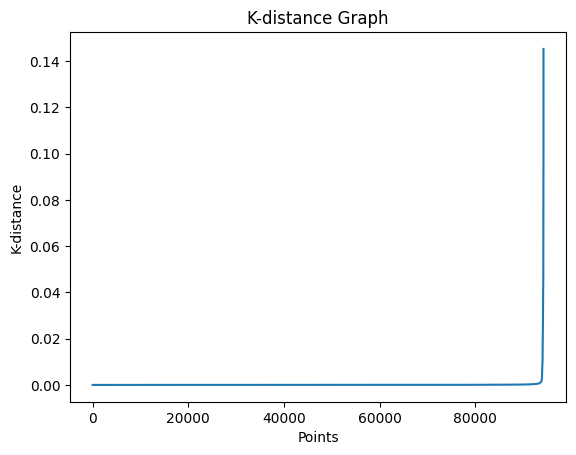

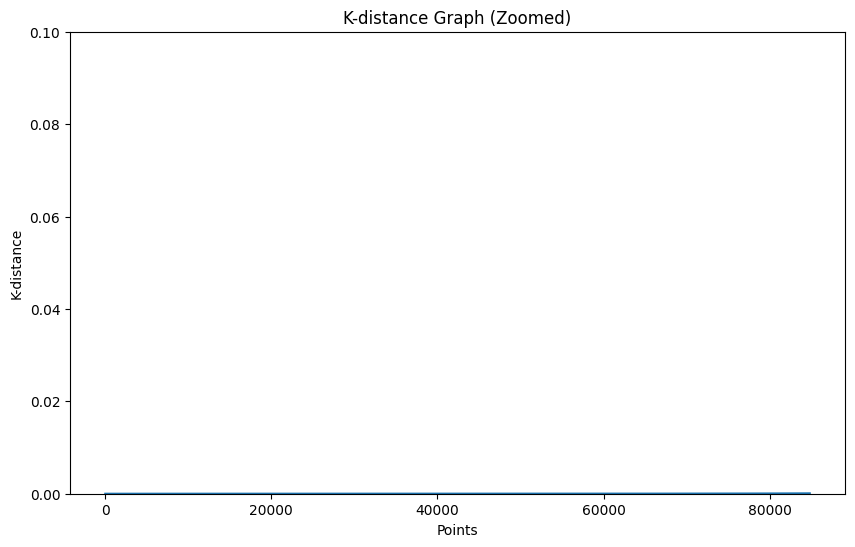

Quelques valeurs de k-distance à considérer:
1% percentile: 0.00000
5% percentile: 0.00000
10% percentile: 0.00000


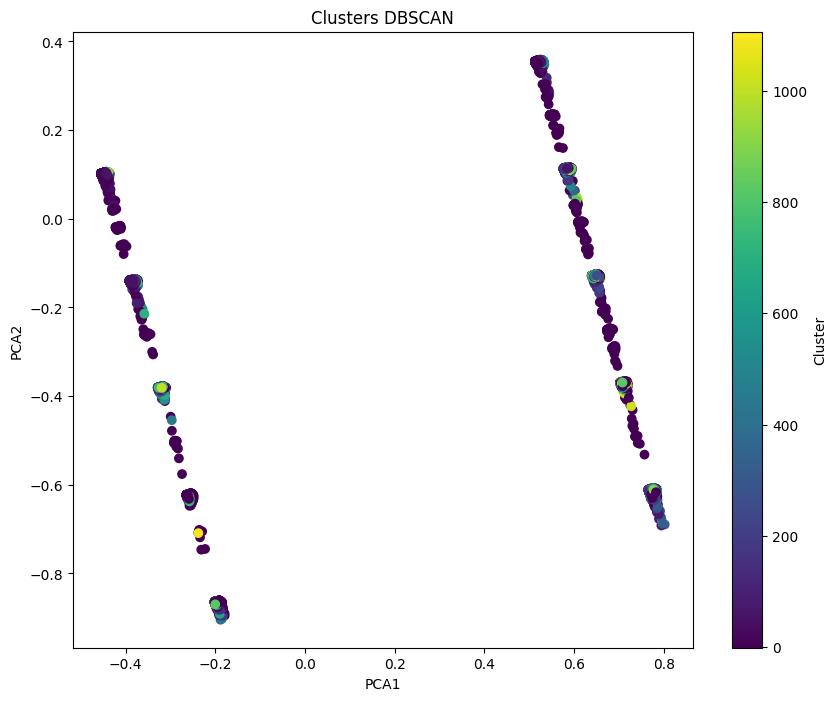

Nombre estimé de clusters: 1107
Nombre estimé de points de bruit: 3924


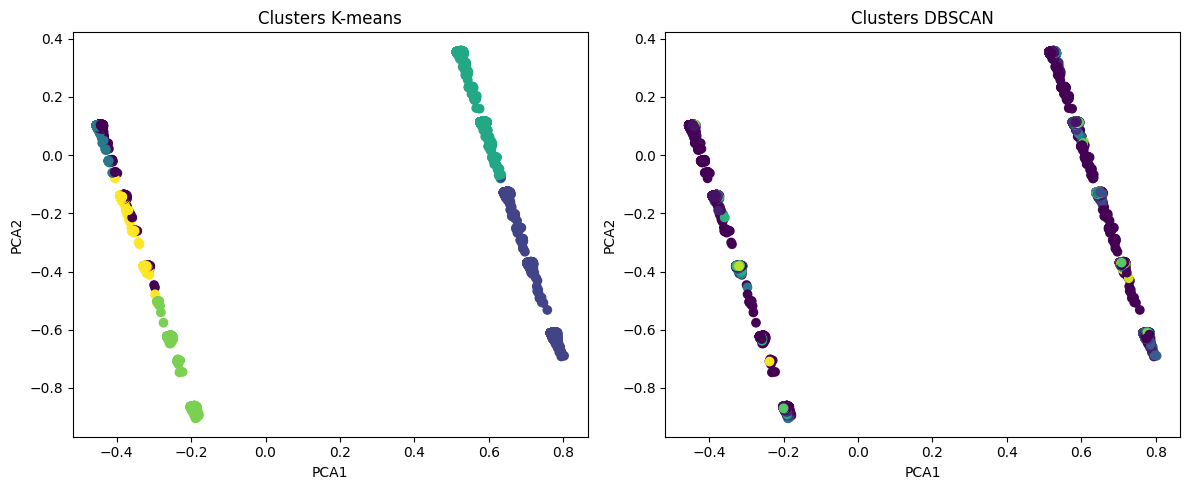

In [25]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Supposons que 'features' contient vos données normalisées

# Étape 1: Trouver le epsilon optimal
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(distances[:int(len(distances)*0.9)])  # Plot only the first 90% of points
plt.title('K-distance Graph (Zoomed)')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.ylim(0, 0.1)  # Limit y-axis to 0.1
plt.show()

print("Quelques valeurs de k-distance à considérer:")
print(f"1% percentile: {np.percentile(distances, 1):.5f}")
print(f"5% percentile: {np.percentile(distances, 5):.5f}")
print(f"10% percentile: {np.percentile(distances, 10):.5f}")

# Choisissez le point d'inflexion comme epsilon
#epsilon = float(input("Basé sur le graphique, entrez la valeur d'epsilon choisie: "))
epsilon = 0.00070

# Étape 2: Appliquer DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_clusters = dbscan.fit_predict(features)

# Ajouter les labels DBSCAN au DataFrame
df['dbscan_cluster'] = dbscan_clusters

# Étape 3: Visualiser les résultats
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

# Étape 4: Analyser les résultats
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f'Nombre estimé de clusters: {n_clusters}')
print(f'Nombre estimé de points de bruit: {n_noise}')

# Comparaison avec K-means
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(df['pca1'], df['pca2'], c=df['cluster_label'], cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(122)
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

In [26]:
# Tu as déjà les colonnes suivantes, donc cette étape est probablement déjà faite.
df['Recency'] = df['days_since_last_order']
df['Frequency'] = df['total_orders']
df['Monetary'] = df['total_spent']


In [27]:
exit(0)

In [28]:
# Calcul des percentiles pour 'Recency' (où un score bas est bon)
percentiles_r = df['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Calcul des percentiles pour 'Frequency' et 'Monetary' (où un score élevé est bon)
percentiles_f = df['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).values
percentiles_m = df['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Fonction pour attribuer les scores basés sur les percentiles
def assign_score(value, percentiles, high_is_good=True):
    if high_is_good:
        if value <= percentiles[0]:
            return 1
        elif value <= percentiles[1]:
            return 2
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 4
        else:
            return 5
    else:
        if value <= percentiles[0]:
            return 5
        elif value <= percentiles[1]:
            return 4
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 2
        else:
            return 1



In [29]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_type,...,last_payment_installments_normalized,last_order_status_delivered,cluster_label,pca1,pca2,pca3,dbscan_cluster,Recency,Frequency,Monetary
6807,12611e5049d58be3e7edc5fa448d9ad4,1,9.155278,484.294873,103.55,4.0,0.0,0.0,1,credit_card,...,0.166667,True,3,0.586563,0.114075,0.274734,399,484.294873,1,103.55
31621,55bb89d4c9e83251c6d298c9105e240a,1,5.876979,455.789039,51.80,5.0,0.0,0.0,0,credit_card,...,0.083333,True,0,-0.445605,0.103755,0.245659,3,455.789039,1,51.80
36409,628ebf2c7d5539361dda045b7eb49fa7,1,7.126354,481.229051,144.59,5.0,0.0,0.0,0,credit_card,...,0.041667,True,0,-0.445487,0.103861,0.280922,37,481.229051,1,144.59
83063,e13e53b911d67b6cd20ff61aecd5d42a,1,7.067118,100.183310,499.46,3.0,0.0,0.0,0,credit_card,...,0.208333,True,5,-0.325008,-0.382547,-0.261178,-1,100.183310,1,499.46
58386,9e68d26d315d60419f3867d508294a99,1,4.898067,133.232616,113.76,3.0,0.0,0.0,1,credit_card,...,0.083333,True,1,0.641404,-0.128296,-0.233141,511,133.232616,1,113.76
2756,0773c75b1e8a2d0338672615e3283064,1,17.166308,446.133113,76.76,5.0,0.0,0.0,0,credit_card,...,0.083333,True,0,-0.445121,0.101137,0.232910,3,446.133113,1,76.76
29944,5131a2eb849e0d5a5c12a4ca3944d4f2,1,7.831204,285.042685,83.70,5.0,0.0,0.0,1,credit_card,...,0.333333,True,3,0.521311,0.353618,-0.005951,0,285.042685,1,83.70
26526,47e7935b999ad9d38e00bb765d39f7fa,1,3.168507,163.100035,86.88,5.0,0.0,0.0,0,credit_card,...,0.041667,True,2,-0.452108,0.102663,-0.176652,10,163.100035,1,86.88
93346,fd7e89f7ec246761c5196c2bbfc64d46,1,12.123866,133.098623,87.47,2.0,0.0,0.0,1,credit_card,...,0.166667,True,1,0.705870,-0.371862,-0.229866,537,133.098623,1,87.47
82617,dff98074d63b08b4581e6acef9ff17e0,1,9.332801,386.236806,124.40,5.0,0.0,0.0,1,boleto,...,0.041667,True,3,0.520093,0.355551,0.129664,47,386.236806,1,124.40


In [30]:
# Ajoutez ces imports au début du notebook si ce n'est pas déjà fait
import joblib
from datetime import timedelta

# Après votre meilleur modèle KMeans (supposons que c'est kmeans_optimal)
# Sauvegarde du meilleur modèle
joblib.dump(kmeans_optimal, 'kmeans_optimal.joblib')

# Création d'un DataFrame avec les données dégradées (décalées d'un an)
df_degraded = df.copy()

# Vérifiez si 'days_since_last_order' existe, sinon utilisez une autre colonne pertinente
if 'days_since_last_order' in df_degraded.columns:
    df_degraded['days_since_last_order'] += 365
else:
    print("Attention : La colonne 'days_since_last_order' n'existe pas. Veuillez vérifier vos colonnes.")

# Recalcul des features normalisées pour les données dégradées
features_to_normalize = [
    'total_orders', 'avg_delivery_time_days', 'total_spent', 
    'avg_review_score', 'avg_delivery_delay_days', 'max_delivery_delay_days', 
    'has_comment', 'last_payment_installments'
]

# Ajoutez 'days_since_last_order' à la liste si elle existe
if 'days_since_last_order' in df_degraded.columns:
    features_to_normalize.append('days_since_last_order')

for feature in features_to_normalize:
    if feature in df_degraded.columns:
        df_degraded[f'{feature}_normalized'] = (df_degraded[feature] - df_degraded[feature].min()) / (df_degraded[feature].max() - df_degraded[feature].min())
    else:
        print(f"Attention : La colonne '{feature}' n'existe pas. Elle ne sera pas normalisée.")

# Sélection des features normalisées pour le clustering dégradé
features_degraded = [f'{feature}_normalized' for feature in features_to_normalize if f'{feature}_normalized' in df_degraded.columns]
X_degraded = df_degraded[features_degraded]

# Création et entraînement du modèle KMeans dégradé
kmeans_degraded = KMeans(n_clusters=6, random_state=42)
kmeans_degraded.fit(X_degraded)

# Sauvegarde du modèle dégradé
joblib.dump(kmeans_degraded, 'kmeans_degraded.joblib')

print("Les modèles optimal et dégradé ont été sauvegardés.")
print("Features utilisées pour le modèle dégradé :", features_degraded)

Les modèles optimal et dégradé ont été sauvegardés.
Features utilisées pour le modèle dégradé : ['total_orders_normalized', 'avg_delivery_time_days_normalized', 'total_spent_normalized', 'avg_review_score_normalized', 'avg_delivery_delay_days_normalized', 'max_delivery_delay_days_normalized', 'has_comment_normalized', 'last_payment_installments_normalized', 'days_since_last_order_normalized']


: 